In [1]:
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

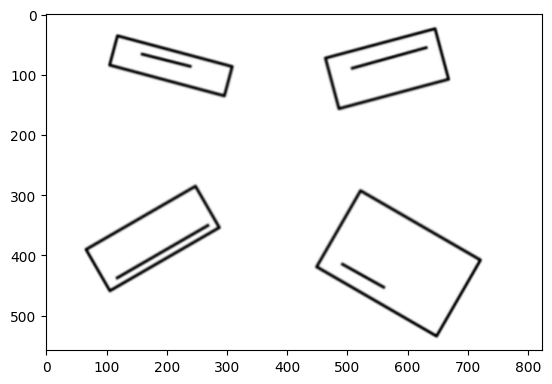

In [5]:
plt.imshow(mpimg.imread('image.png'))

In [5]:
# Step 1: Read the image
image = cv2.imread('image.png')

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Edge detection
edges = cv2.Canny(gray, 50, 150)

# Step 4: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Step 4: Found {len(contours)} contours.")

# Step 5: Filter and approximate contours to find rectangles
rectangles = []
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:  # Check if the contour has 4 vertices
        rectangles.append(approx)
print(f"Step 5: Found {len(rectangles)} rectangles.")

# Create a blank image to draw the aligned rectangles
output_image = np.zeros_like(image)

# Step 6: Rotate and align rectangles
for rect in rectangles:
    # Convert rect to a NumPy array of float32
    rect = np.array(rect, dtype='float32').reshape((4, 2))
    
    # Sort points in rect by their x-coordinates to reorder them
    rect = sorted(rect, key=lambda x: x[0])

    # Ensure points are in consistent order: top-left, top-right, bottom-right, bottom-left
    if rect[0][1] > rect[1][1]:
        rect[0], rect[1] = rect[1], rect[0]
    if rect[2][1] < rect[3][1]:
        rect[2], rect[3] = rect[3], rect[2]

    # Compute the width and height of the new aligned rectangle
    width = int(np.linalg.norm(rect[0] - rect[1]))
    height = int(np.linalg.norm(rect[1] - rect[2]))

    # Define the destination points for the perspective transform
    dst = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype='float32')

    # Get the perspective transform matrix
    M = cv2.getPerspectiveTransform(np.array(rect, dtype='float32'), dst)

    # Warp the original image to get the aligned rectangle
    warped = cv2.warpPerspective(image, M, (width, height))

    # Find the bounding box for the aligned rectangle
    x, y, w, h = cv2.boundingRect(np.array(rect, dtype='int32'))
    
    # Draw the aligned rectangle on the output image
    output_image[y:y+h, x:x+w] = cv2.resize(warped, (w, h))

# Step 7: Draw and display the result
for rect in rectangles:
    cv2.polylines(output_image, [rect.reshape((-1, 1, 2)).astype(np.int32)], True, (0, 255, 0), 2)

# Save the final image with aligned rectangles
cv2.imwrite('output_image.png', output_image)


Step 4: Found 22 contours.
Step 5: Found 16 rectangles.


True

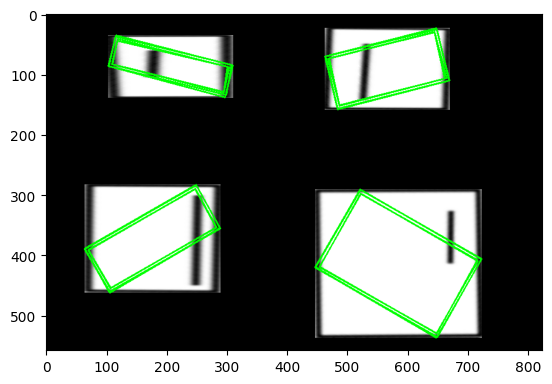

In [11]:
plt.imshow(mpimg.imread('output_image.png'))